In [218]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_selection import RFE

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import accuracy_score, classification_report

In [219]:
plt.style.use('seaborn')

In [220]:
df=pd.read_csv('employee_attrition_github.csv')
df.head()

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,3,3,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,2,2,4,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,3,3,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,4,2,3,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,5,3,3,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,...,4.0,Y,12,8,2,9.0,2,6,0,4


Education - 
1. 'Below College'
2. 'College'
3. 'Bachelor'
4. 'Master'
5. 'Doctor'

EnvironmentSatisfaction
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

JobInvolvement
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

JobSatisfaction
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

PerformanceRating
1. 'Low'
2. 'Good'
3. 'Excellent'
4. 'Outstanding'

WorkLifeBalance
1. 'Bad'
2. 'Good'
3. 'Better'
4. 'Best'

In [221]:
df.columns

Index(['EmployeeID', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

### Checking for Null values 

In [222]:
df.isnull().sum()

EmployeeID                  0
JobInvolvement              0
PerformanceRating           0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

There are few null values in some of the attributes.

In [223]:
print('Null value % of EnvironmentSatisfaction containing in data: {}'.format((len(df.EnvironmentSatisfaction[df.EnvironmentSatisfaction.isnull()])/len(df)) * 100))
print('Null value % of JobSatisfaction containing in data: {}'.format((len(df.JobSatisfaction[df.JobSatisfaction.isnull()])/len(df)) * 100))
print('Null value % of WorkLifeBalance containing in data: {}'.format((len(df.WorkLifeBalance[df.WorkLifeBalance.isnull()])/len(df)) * 100))
print('Null value % of NumCompaniesWorked containing in data: {}'.format((len(df.NumCompaniesWorked[df.NumCompaniesWorked.isnull()])/len(df)) * 100))

Null value % of EnvironmentSatisfaction containing in data: 0.5668934240362812
Null value % of JobSatisfaction containing in data: 0.45351473922902497
Null value % of WorkLifeBalance containing in data: 0.8616780045351473
Null value % of NumCompaniesWorked containing in data: 0.43083900226757366


Out of 100% only 0.5,0.4,0.8,0.4% of the data is missing so we are deleting all the rows that contains null values

In [224]:
len(df)

4410

In [225]:
df.dropna(inplace=True)
len(df)

4300

# Dropping unessasary columns

In [226]:
df.drop(['EmployeeID'],axis=1,inplace=True)

EmployeeID doesn't help in finding the attrition rate except identifying rows uniquely so we dropped it

In [227]:
df.EmployeeCount.unique()
df.drop(['EmployeeCount'],axis=1,inplace=True)

We are dropping Employee count as well because it doesn't really contribute in finding attrition

In [228]:
df.StandardHours.unique()
df.drop(['StandardHours','Over18'],axis=1,inplace=True)

We are dropping StandardHours, Over18 because all the rows have same value 

## Description of data

In [229]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
JobInvolvement,4300.0,2.728837,0.710769,1.0,2.0,3.0,3.00,4.0
PerformanceRating,4300.0,3.153953,0.360946,3.0,3.0,3.0,3.00,4.0
EnvironmentSatisfaction,4300.0,2.723953,1.093802,1.0,2.0,3.0,4.00,4.0
JobSatisfaction,4300.0,2.724884,1.101875,1.0,2.0,3.0,4.00,4.0
WorkLifeBalance,4300.0,2.761163,0.707800,1.0,2.0,3.0,3.00,4.0
Age,4300.0,36.926977,9.146517,18.0,30.0,36.0,43.00,60.0
DistanceFromHome,4300.0,9.197907,8.097059,1.0,2.0,7.0,14.00,29.0
Education,4300.0,2.913256,1.024774,1.0,2.0,3.0,4.00,5.0
JobLevel,4300.0,2.066977,1.106633,1.0,1.0,2.0,3.00,5.0
MonthlyIncome,4300.0,65059.844186,47045.398914,10090.0,29260.0,49360.0,83802.50,199990.0


## EDA

# Uni-variant analysis

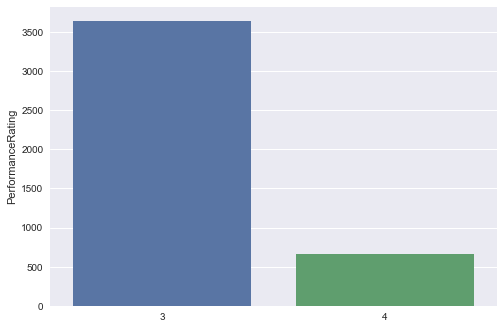

In [230]:
sns.barplot(df.PerformanceRating.unique(),df.PerformanceRating.value_counts());

In [231]:
df.YearsSinceLastPromotion.unique()

array([ 0,  1,  7,  4,  9,  6,  3,  5,  2,  8, 11, 13, 12, 10, 15, 14],
      dtype=int64)

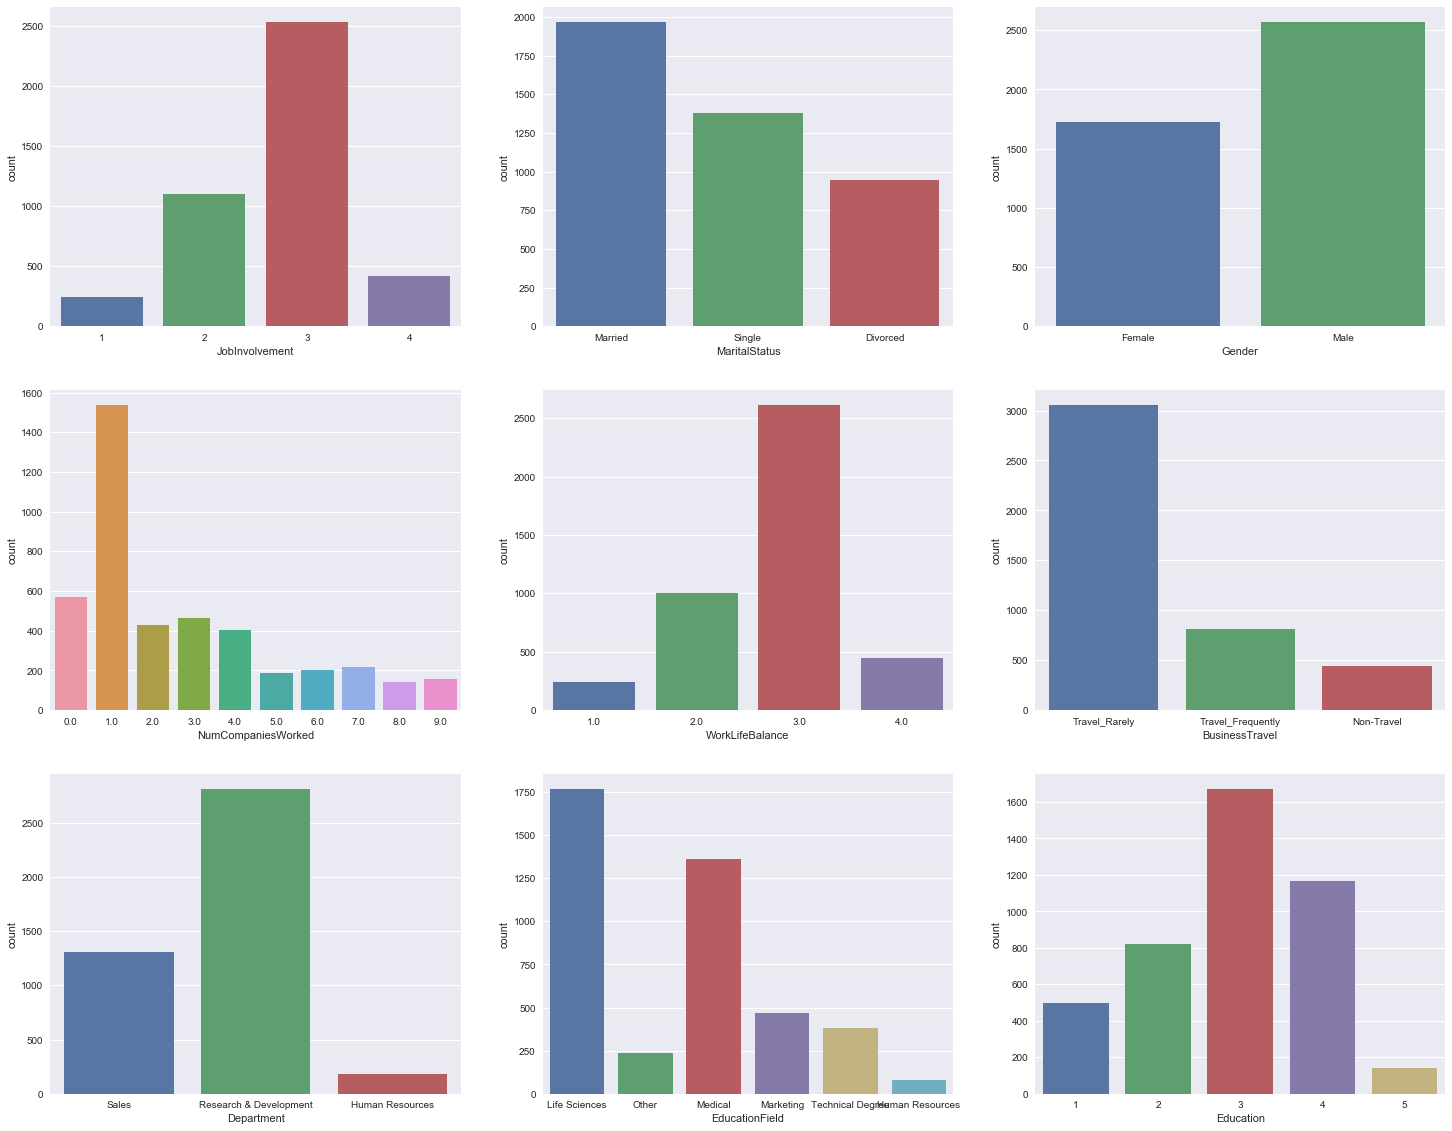

In [232]:
plt.figure(figsize=(25,20))
plt.subplot(3,3,1)
sns.countplot(df.JobInvolvement);
plt.subplot(3,3,2)
sns.countplot(df.MaritalStatus);
plt.subplot(3,3,3)
sns.countplot(df.Gender);
plt.subplot(3,3,4)
sns.countplot(df.NumCompaniesWorked);
plt.subplot(3,3,5)
sns.countplot(df.WorkLifeBalance);
plt.subplot(3,3,6)
sns.countplot(df.BusinessTravel);
plt.subplot(3,3,7)
sns.countplot(df.Department);
plt.subplot(3,3,8)
sns.countplot(df.EducationField);
plt.subplot(3,3,9)
sns.countplot(df.Education);
plt.show()

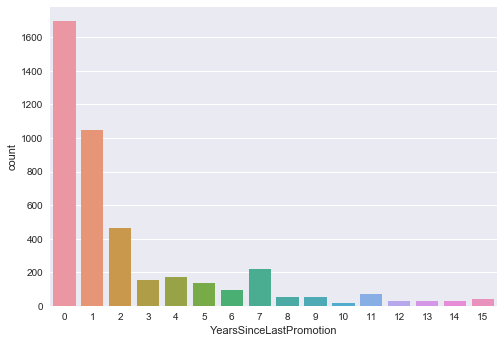

In [233]:
sns.countplot(df.YearsSinceLastPromotion);

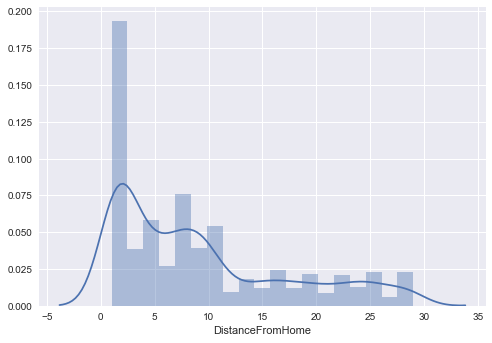

In [234]:
sns.distplot(df.DistanceFromHome);

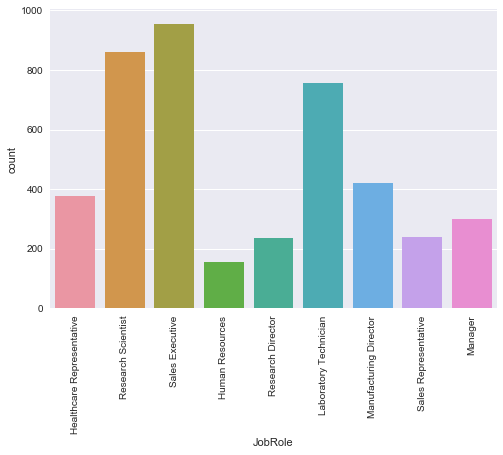

In [235]:
sns.countplot(df.JobRole);
plt.xticks(rotation=90)
plt.show()

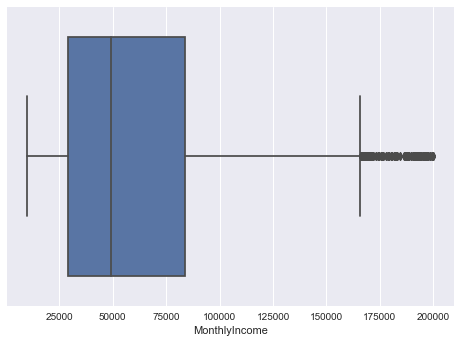

In [236]:
sns.boxplot(df.MonthlyIncome);

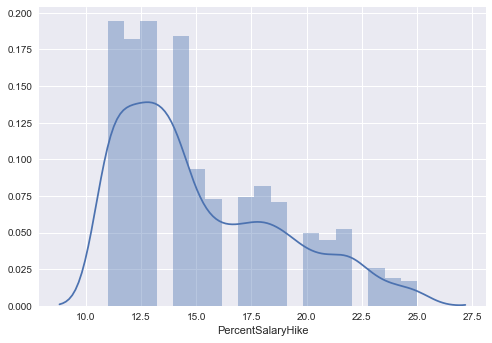

In [237]:
sns.distplot(df.PercentSalaryHike);

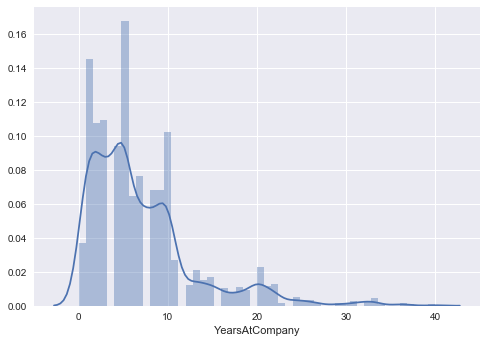

In [238]:
sns.distplot(df.YearsAtCompany);

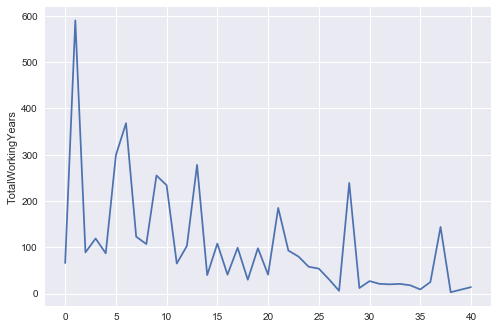

In [239]:
sns.lineplot(df.TotalWorkingYears.unique(),df.TotalWorkingYears.value_counts());

# Bi-Variant analysis

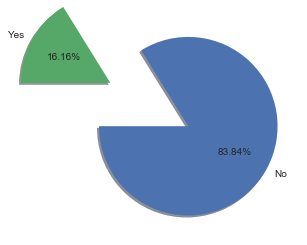

In [240]:
plt.figure(figsize=(4,7))
plt.pie(df.Attrition.value_counts(),
        shadow=True,
        labels=df.Attrition.unique(),
        autopct='%.2f%%',
        explode=[0,1],
        startangle=180);

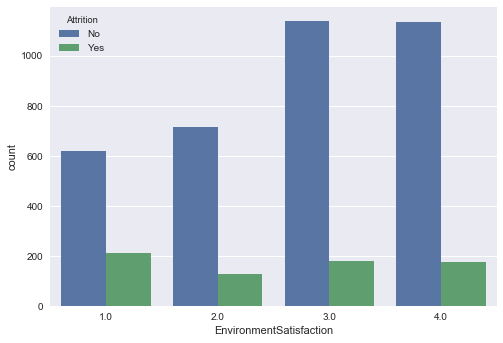

In [241]:
sns.countplot(df.EnvironmentSatisfaction,hue=df.Attrition);

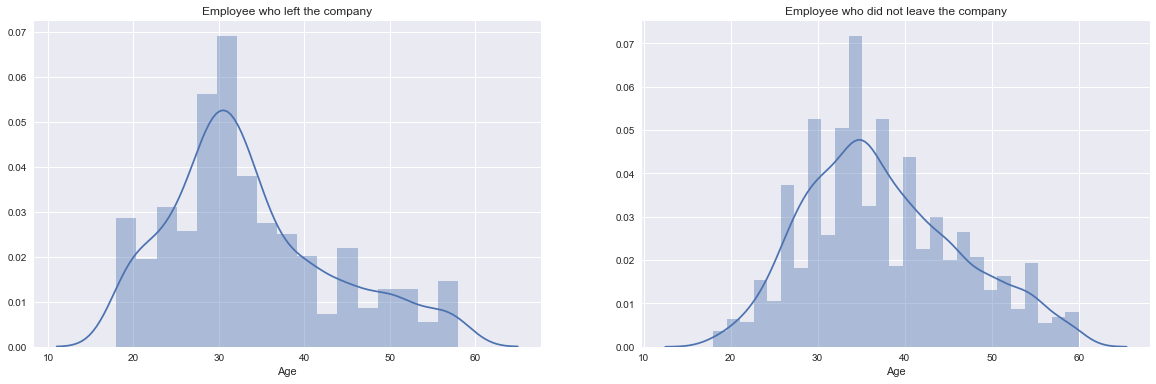

In [242]:
attrition_yes=df[df.Attrition=='Yes']
attrition_No=df[df.Attrition=='No']
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(attrition_yes.Age);
plt.title('Employee who left the company')
plt.subplot(1,2,2)
sns.distplot(attrition_No.Age);
plt.title('Employee who did not leave the company')
plt.show()

People at the age of 30's are tend to leave company more

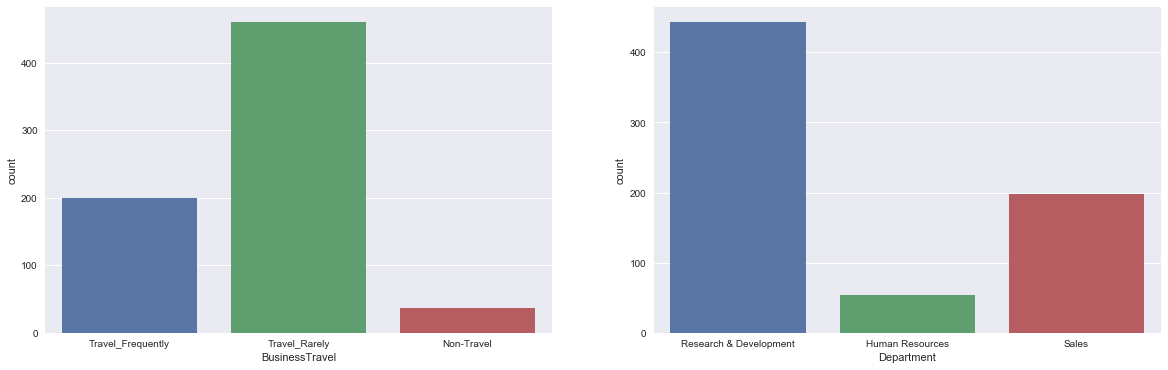

In [243]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot(attrition_yes.BusinessTravel);
plt.subplot(1,2,2)
sns.countplot(attrition_yes.Department);
plt.show()

 - Employees who travel rarely are tend to leave the company 
 - Employees from R&D, Sales department are more likely to leave the job

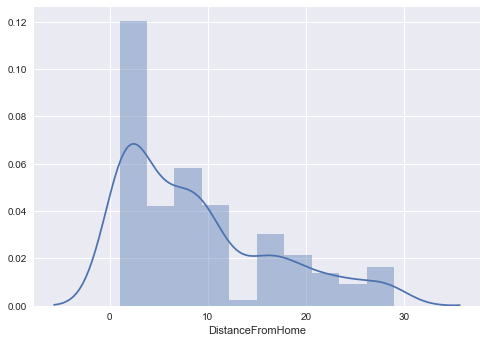

In [244]:
sns.distplot(attrition_yes.DistanceFromHome);

## Data Preparation

In [245]:
def Age_categories(a):
    if a>17 and a<=25:
        return '17-25'
    if a>25 and a<=29:
        return '26-30'
    if a>=30 and a<36:
        return '30-36'
    if a>=36 and a<40:
        return '36-40'
    if a>=41 and a<50:
        return '40-50'
    if a>=50 and a<60:
        return '50-60'
    
df.Age = df.Age.apply(Age_categories)

In [246]:
a1 = pd.get_dummies(df.Age,prefix='Age')
df = pd.concat([a1,df],axis=1)
df.drop(['Age'],inplace=True,axis=1)

#### Converting some binary variables (Yes/No) to 0/1

In [247]:
df.Attrition = df.Attrition.map({'No':0,'Yes':1})

#### For categorical variables with multiple levels, create dummy features 

In [248]:
var=['BusinessTravel','Department','Gender','JobRole','MaritalStatus']
d = pd.get_dummies(df[var],drop_first=True)
df = pd.concat([df,d],axis=1)
df.drop(var,inplace=True,axis=1)

In [249]:
d = pd.get_dummies(df.EducationField)
df = pd.concat([df,d],axis=1)
df.drop(['Other'],axis=1,inplace=True)
df.drop(['EducationField'],inplace=True,axis=1)

In [250]:
df.Education = df.Education.map({1:'Below College',2:'College',3:'Bachelor',4:'Masters',5:'Doctor'})
df.EnvironmentSatisfaction = df.EnvironmentSatisfaction.map({1:'Low',2:'Medium',3:'High',4:'Very High'})
df.JobInvolvement = df.JobInvolvement.map({1:'Low',2:'Medium',3:'High',4:'Very High'})
df.JobSatisfaction = df.JobSatisfaction.map({1:'Low',2:'Medium',3:'High',4:'Very High'})
df.PerformanceRating = df.PerformanceRating.map({1:'Low',2:'Good',3:'Excellent',4:'Outstanding'})
df.WorkLifeBalance = df.WorkLifeBalance.map({1:'Bad',2:'Good',3:'Better',4:'Best'})

In [251]:
v1 = pd.get_dummies(df.Education,prefix='Education')
v2 = pd.get_dummies(df.EnvironmentSatisfaction,prefix='EnvironmentSatisfaction')
v3 = pd.get_dummies(df.JobInvolvement,prefix='JobInvolvement')
v4 = pd.get_dummies(df.PerformanceRating,prefix='PerformanceRating')
v5 = pd.get_dummies(df.WorkLifeBalance,prefix='WorkLifeBalance')
v6 = pd.get_dummies(df.JobSatisfaction,prefix='JobSatisfaction')
df.drop(['Education','EnvironmentSatisfaction','JobInvolvement','PerformanceRating','WorkLifeBalance','JobSatisfaction'],inplace=True,axis=1)
df = pd.concat([df,v1,v2,v3,v4,v5,v6],axis=1)

In [252]:
a1 = pd.get_dummies(df.JobLevel,prefix='JobLevel')
df.drop(['JobLevel'],axis=1,inplace=True)
df = pd.concat([a1,df],axis=1)

In [253]:
a1 = pd.get_dummies(df.NumCompaniesWorked,prefix='NumCompaniesWorked')
df.drop(['NumCompaniesWorked'],axis=1,inplace=True)
df = pd.concat([a1,df],axis=1)

In [254]:
a1 = pd.get_dummies(df.StockOptionLevel,prefix='StockOptionLevel')
df.drop(['StockOptionLevel'],axis=1,inplace=True)
df = pd.concat([a1,df],axis=1)

## Train-Test Split

In [255]:
x = df.drop('Attrition',axis=1)
y = df['Attrition']

In [256]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

## Feature Scaling

In [257]:
var=['DistanceFromHome','MonthlyIncome','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','TrainingTimesLastYear',
     'YearsSinceLastPromotion','YearsWithCurrManager']
scaler = StandardScaler()
x_train[var] = scaler.fit_transform(x_train[var])

In [258]:
churn = (sum(df['Attrition'])/len(df['Attrition'].index))*100
churn

16.162790697674417

## Looking at correlations

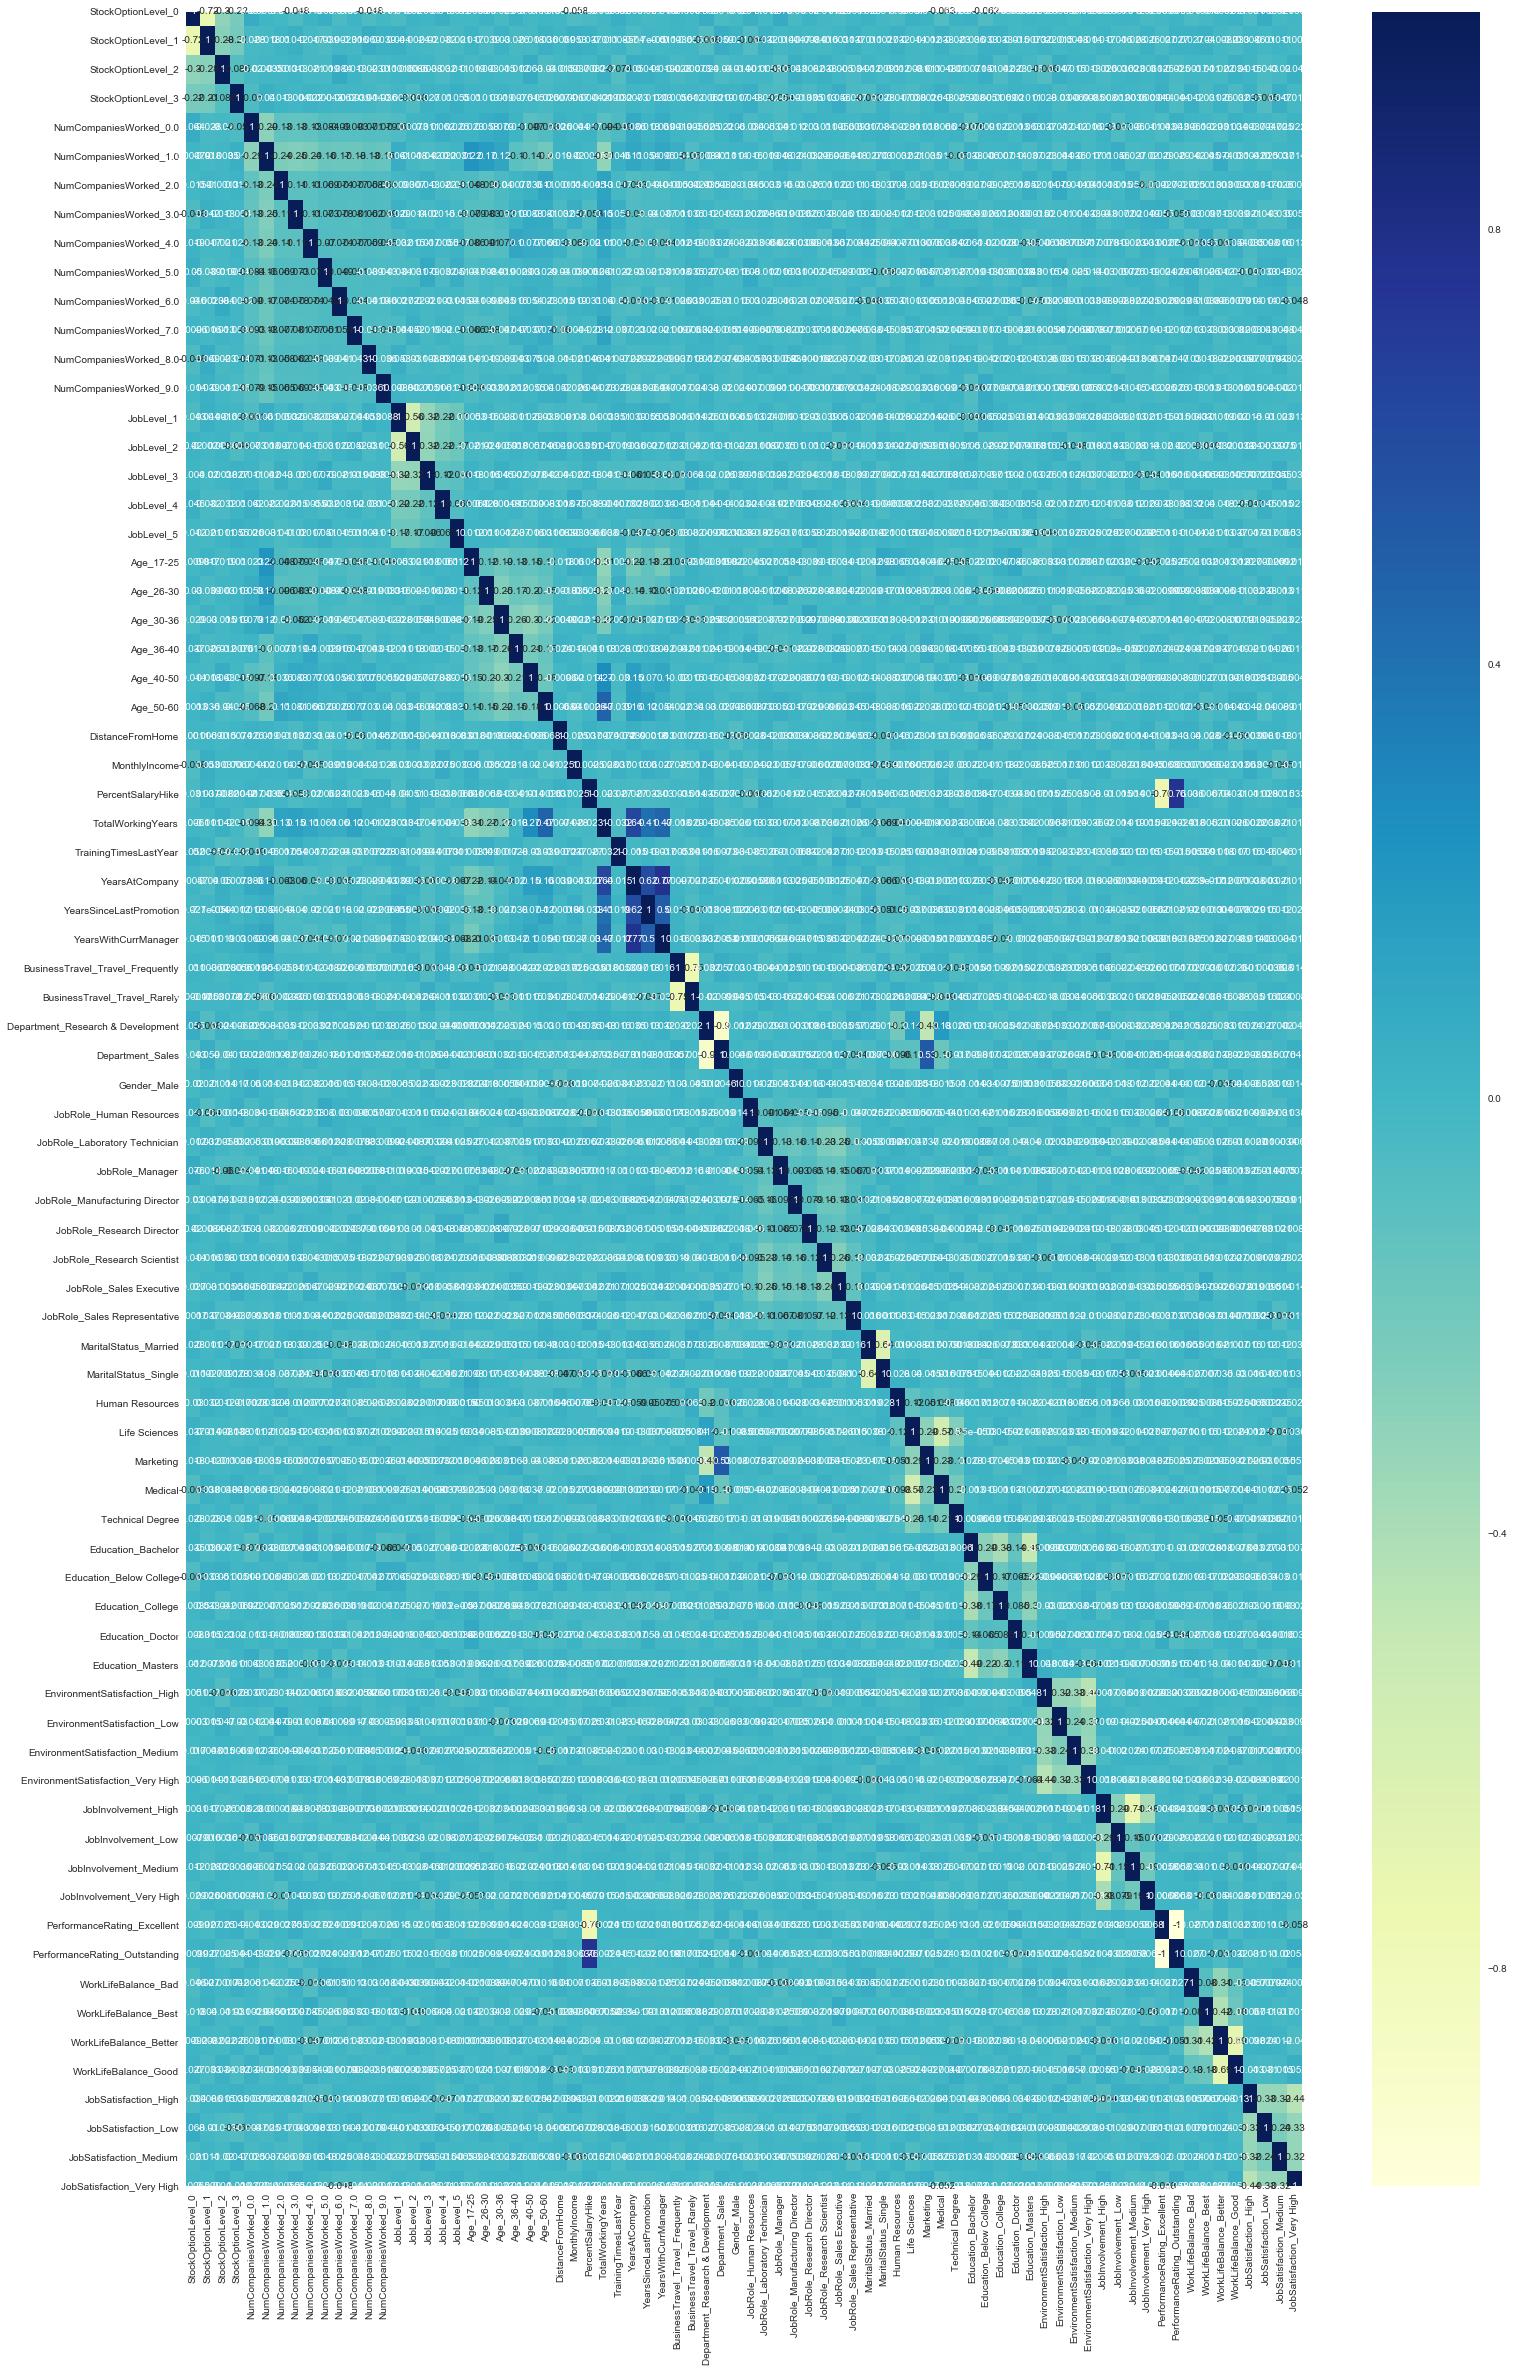

In [259]:
plt.figure(figsize=(25,40))
sns.heatmap(x_train.corr(),cmap='YlGnBu',annot=True);

In [260]:
x_train.drop(['BusinessTravel_Travel_Rarely','Marketing','PerformanceRating_Excellent','PerformanceRating_Outstanding',
        'WorkLifeBalance_Good','StockOptionLevel_0','StockOptionLevel_1','StockOptionLevel_2','StockOptionLevel_3',
        'Department_Sales','MaritalStatus_Single','JobInvolvement_Medium','YearsWithCurrManager',
        'JobLevel_1','TotalWorkingYears','Medical','WorkLifeBalance_Better','JobSatisfaction_High',
         'EnvironmentSatisfaction_High'],axis=1,inplace=True)

x_test.drop(['BusinessTravel_Travel_Rarely','Marketing','PerformanceRating_Excellent','PerformanceRating_Outstanding',
        'WorkLifeBalance_Good','StockOptionLevel_0','StockOptionLevel_1','StockOptionLevel_2','StockOptionLevel_3',
        'Department_Sales','MaritalStatus_Single','JobInvolvement_Medium','YearsWithCurrManager',
        'JobLevel_1','TotalWorkingYears','Medical','WorkLifeBalance_Better','JobSatisfaction_High',
         'EnvironmentSatisfaction_High'],axis=1,inplace=True)


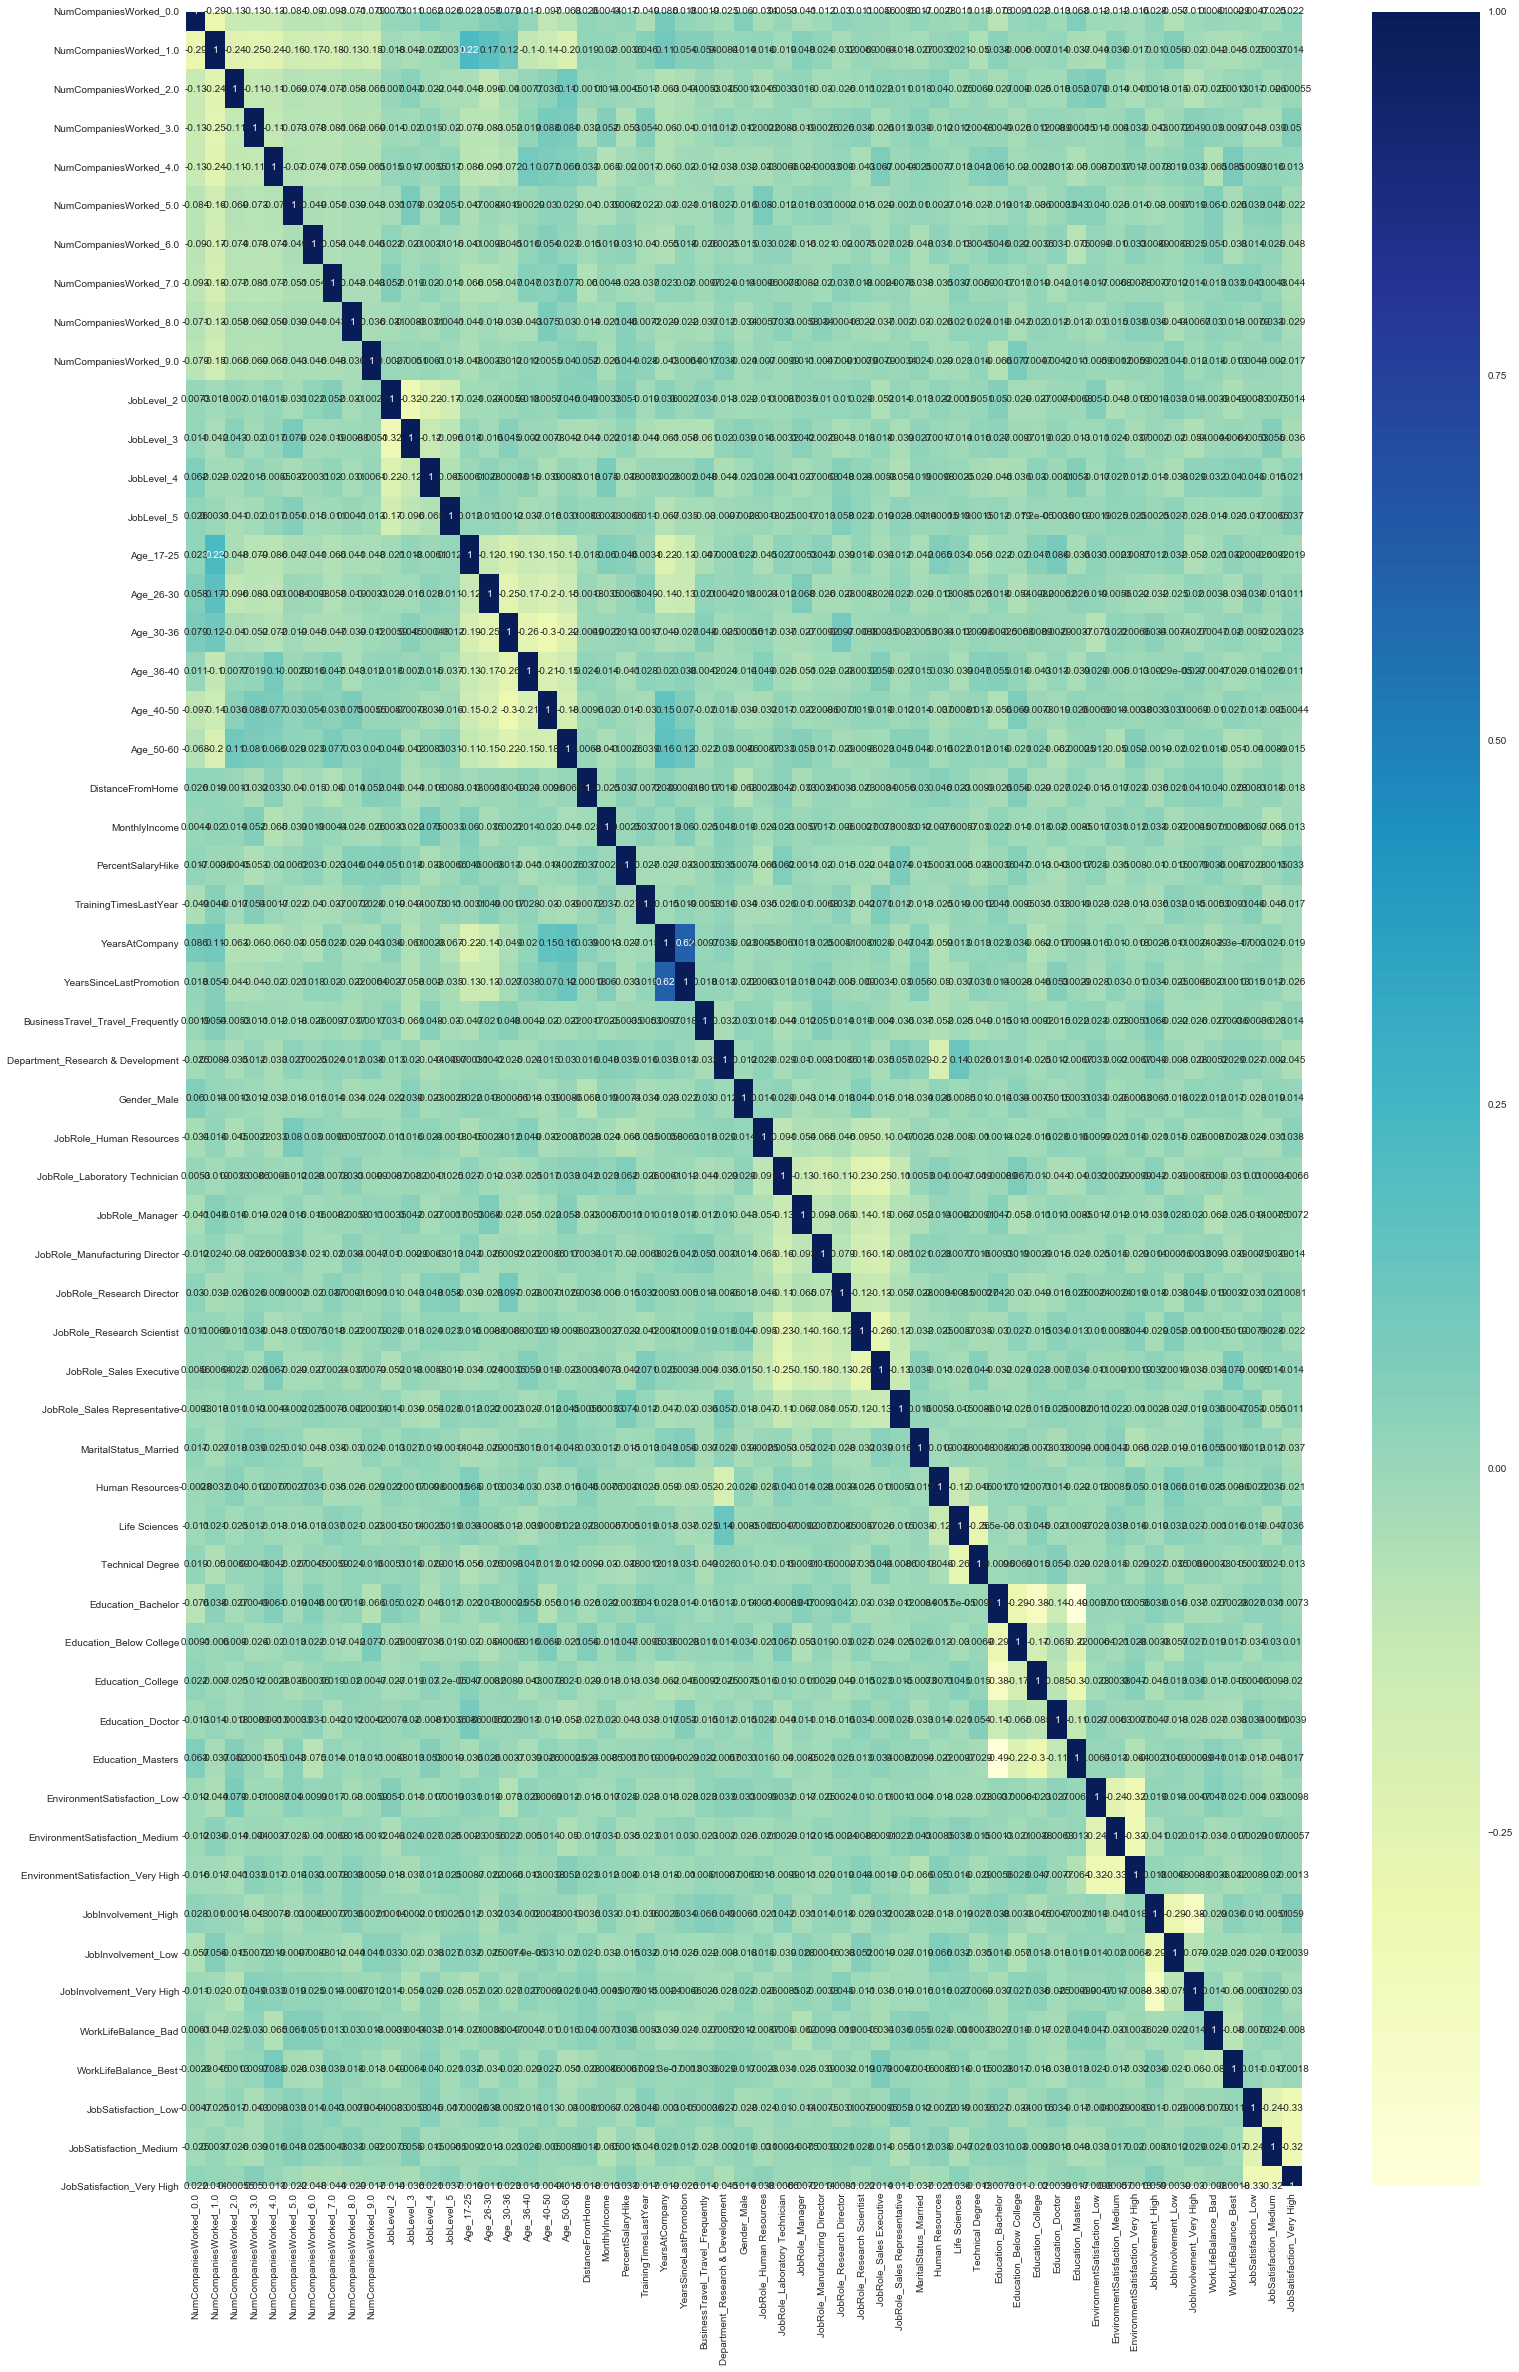

In [261]:
plt.figure(figsize=(25,40))
sns.heatmap(x_train.corr(),cmap='YlGnBu',annot=True);

## Model Building

In [262]:
logm1 = sm.GLM(y_train,sm.add_constant(x_train),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 3010
Model:                            GLM   Df Residuals:                     2954
Model Family:                Binomial   Df Model:                           55
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1074.7
Date:                Tue, 25 Oct 2022   Deviance:                       2149.5
Time:                        18:04:09   Pearson chi2:                 5.09e+03
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -2.4516      0.348     -7.045      0.000      -3.134      -1.770
NumCompaniesWorked_0.0               -0.9542      0.186     -5.128      0.000      -1.319      -0.590
NumCompaniesWorked_1.0               -0.3584      0.127     -2.813      0.005      -0.608      -0.109
NumCompaniesWorked_2.0               -0.8025      0.205     -3.907      0.000      -1.205      -0.400
NumCompaniesWorked_3.0               -0.9465      0.215     -4.405      0.000      -1.368      -0.525
NumCompaniesWorked_4.0               -0.3653      0.194     -1.883      0.060      -0.745       0.015
NumCompaniesWorked_5.0                0.3696      0.217      1.705      0.088      -0.055       0.794
NumCompaniesWorked_6.0                0.0585      0.210      0.279      0.781      -0.353       0.470
NumCompaniesWorked_7.0                0.2468      0.209      1.183      0.237      -0.162       0.656
NumCompaniesWorked_8.0               -0.0871      0.290     -0.300      0.764      -0.655       0.481
NumCompaniesWorked_9.0                0.3873      0.233      1.660      0.097      -0.070       0.845
JobLevel_2                            0.1696      0.133      1.272      0.203      -0.092       0.431
JobLevel_3                            0.0376      0.174      0.217      0.829      -0.303       0.378
JobLevel_4                           -0.1954      0.234     -0.836      0.403      -0.654       0.263
JobLevel_5                           -0.5773      0.310     -1.864      0.062      -1.184       0.030
Age_17-25                             1.7128      0.386      4.437      0.000       0.956       2.469
Age_26-30                             1.0949      0.368      2.973      0.003       0.373       1.817
Age_30-36                             0.7856      0.352      2.229      0.026       0.095       1.476
Age_36-40                            -0.0126      0.377     -0.033      0.973      -0.752       0.727
Age_40-50                             0.1752      0.361      0.486      0.627      -0.532       0.882
Age_50-60                             0.5027      0.376      1.338      0.181      -0.233       1.239
DistanceFromHome                     -0.0513      0.059     -0.867      0.386      -0.167       0.065
MonthlyIncome                        -0.1060      0.059     -1.808      0.071      -0.221       0.009
PercentSalaryHike                     0.0420      0.057      0.741      0.459      -0.069       0.153
TrainingTimesLastYear                -0.1962      0.060     -3.292      0.001      -0.313      -0.079
YearsAtCompany                       -0.7758      0.108     -7.178      0.000      -0.988      -0.564
YearsSinceLastPromotion               0.5140      0.086      5.967      0.000       0.345       0.683
BusinessTravel_Travel_F

## Feature Selection using RFE

In [263]:
logreg = LogisticRegression()

In [264]:
rfe = RFE(logreg,25)           
rfe = rfe.fit(x_train,y_train)

In [265]:
rfe.support_

array([ True, False,  True,  True, False,  True, False,  True, False,
        True, False, False, False,  True,  True, False, False,  True,
        True, False, False, False, False, False,  True,  True,  True,
       False, False,  True, False,  True,  True,  True, False, False,
        True,  True,  True, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False,  True, False,
        True, False,  True])

In [266]:
list(zip(x_train.columns,rfe.ranking_,rfe.support_))

[('NumCompaniesWorked_0.0', 1, True),
 ('NumCompaniesWorked_1.0', 4, False),
 ('NumCompaniesWorked_2.0', 1, True),
 ('NumCompaniesWorked_3.0', 1, True),
 ('NumCompaniesWorked_4.0', 3, False),
 ('NumCompaniesWorked_5.0', 1, True),
 ('NumCompaniesWorked_6.0', 16, False),
 ('NumCompaniesWorked_7.0', 1, True),
 ('NumCompaniesWorked_8.0', 26, False),
 ('NumCompaniesWorked_9.0', 1, True),
 ('JobLevel_2', 19, False),
 ('JobLevel_3', 33, False),
 ('JobLevel_4', 6, False),
 ('JobLevel_5', 1, True),
 ('Age_17-25', 1, True),
 ('Age_26-30', 2, False),
 ('Age_30-36', 5, False),
 ('Age_36-40', 1, True),
 ('Age_40-50', 1, True),
 ('Age_50-60', 20, False),
 ('DistanceFromHome', 29, False),
 ('MonthlyIncome', 22, False),
 ('PercentSalaryHike', 28, False),
 ('TrainingTimesLastYear', 11, False),
 ('YearsAtCompany', 1, True),
 ('YearsSinceLastPromotion', 1, True),
 ('BusinessTravel_Travel_Frequently', 1, True),
 ('Department_Research & Development', 27, False),
 ('Gender_Male', 23, False),
 ('JobRole_Huma

In [267]:
col = x_train.columns[rfe.support_]

In [268]:
x_train.columns[~rfe.support_]

Index(['NumCompaniesWorked_1.0', 'NumCompaniesWorked_4.0',
       'NumCompaniesWorked_6.0', 'NumCompaniesWorked_8.0', 'JobLevel_2',
       'JobLevel_3', 'JobLevel_4', 'Age_26-30', 'Age_30-36', 'Age_50-60',
       'DistanceFromHome', 'MonthlyIncome', 'PercentSalaryHike',
       'TrainingTimesLastYear', 'Department_Research & Development',
       'Gender_Male', 'JobRole_Laboratory Technician',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'Life Sciences', 'Technical Degree', 'Education_Bachelor',
       'Education_Below College', 'Education_College', 'Education_Doctor',
       'Education_Masters', 'EnvironmentSatisfaction_Medium',
       'EnvironmentSatisfaction_Very High', 'JobInvolvement_High',
       'JobInvolvement_Very High', 'WorkLifeBalance_Best',
       'JobSatisfaction_Medium'],
      dtype='object')

In [269]:
x_train_sm = sm.add_constant(x_train[col])
logm1 = sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 3010
Model:                            GLM   Df Residuals:                     2984
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1098.3
Date:                Tue, 25 Oct 2022   Deviance:                       2196.6
Time:                        18:04:10   Pearson chi2:                 5.27e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -1.8108      0.128    -14.124      0.000      -2.062      -1.560
NumCompaniesWorked_0.0              -0.5692      0.188     -3.036      0.002      -0.937      -0.202
NumCompaniesWorked_2.0              -0.5999      0.214     -2.800      0.005      -1.020      -0.180
NumCompaniesWorked_3.0              -0.8006      0.231     -3.473      0.001      -1.252      -0.349
NumCompaniesWorked_5.0               0.6083      0.234      2.604      0.009       0.151       1.066
NumCompaniesWorked_7.0               0.5620      0.218      2.574      0.010       0.134       0.990
NumCompaniesWorked_9.0               0.5384      0.250      2.156      0.031       0.049       1.028
JobLevel_5                          -0.6755      0.296     -2.279      0.023      -1.256      -0.095
Age_17-25                            0.8042      0.169      4.756      0.000       0.473       1.136
Age_36-40                           -0.7837      0.186     -4.223      0.000      -1.147      -0.420
Age_40-50                           -0.5164      0.163     -3.177      0.001      -0.835      -0.198
YearsAtCompany                      -0.7990      0.103     -7.755      0.000      -1.001      -0.597
YearsSinceLastPromotion              0.4469      0.083      5.356      0.000       0.283       0.610
BusinessTravel_Travel_Frequently     0.9799      0.128      7.656      0.000       0.729       1.231
JobRole_Human Resources             -0.3635      0.313     -1.162      0.245      -0.977       0.250
JobRole_Manager                     -0.5758      0.230     -2.509      0.012      -1.026      -0.126
JobRole_Manufacturing Director      -0.7731      0.212     -3.655      0.000      -1.188      -0.359
JobRole_Research Director            0.4196      0.226      1.860      0.063      -0.023       0.862
JobRole_Sales Representative        -0.5067      0.256     -1.976      0.048      -1.009      -0.004
MaritalStatus_Married               -0.4224      0.113     -3.744      0.000      -0.644      -0.201
Human Resources                      1.6292      0.296      5.506      0.000       1.049       2.209
EnvironmentSatisfaction_Low          0.8154      0.125      6.498      0.000       0.569       1.061
JobInvolvement_Low                   0.3629      0.218      1.668      0.095      -0.064       0.789
WorkLifeBalance_Bad                  1.0984      0.195      5.634      0.000       0.716       1.480
JobSatisfaction_Low                  0.5517      0.131      4.203      0.000       0.294       0.809
JobSatisfaction_Very High           -0.6212      0.140     -4.426      0.000      -0.896      -0.346
====================================================================================================
"""

##### Checking VIF's

In [270]:
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,YearsAtCompany,1.74
11,YearsSinceLastPromotion,1.63
18,MaritalStatus_Married,1.59
24,JobSatisfaction_Very High,1.40
9,Age_40-50,1.29
23,JobSatisfaction_Low,1.27
20,EnvironmentSatisfaction_Low,1.22
8,Age_36-40,1.20
0,NumCompaniesWorked_0.0,1.19
2,NumCompaniesWorked_3.0,1.19


VIF's are low so we no need to drop any columns

In [271]:
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

1384    0.340973
4254    0.493008
3644    0.001856
1080    0.124489
893     0.066414
698     0.128194
4025    0.154309
1700    0.010330
1618    0.032878
1766    0.386044
dtype: float64

In [272]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.34097285, 0.4930076 , 0.00185574, 0.12448903, 0.06641392,
       0.12819389, 0.15430896, 0.01032957, 0.03287839, 0.38604383])

In [273]:
y_train_pred_final = pd.DataFrame({'Attrition':y_train.values, 'Attrition_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Attrition,Attrition_Prob,CustID
0,0,0.340973,1384
1,1,0.493008,4254
2,0,0.001856,3644
3,1,0.124489,1080
4,0,0.066414,893


In [274]:
y_train_pred_final['predicted'] = y_train_pred_final.Attrition_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Attrition,Attrition_Prob,CustID,predicted
0,0,0.340973,1384,0
1,1,0.493008,4254,0
2,0,0.001856,3644,0
3,1,0.124489,1080,0
4,0,0.066414,893,0


In [275]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Attrition, y_train_pred_final.predicted )
print(confusion)

[[2474   53]
 [ 403   80]]


In [276]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Attrition, y_train_pred_final.predicted))

0.8485049833887043


###### Dropping JobRole_Human Resources	because probability is greater than 0.05

In [277]:
col = col.drop('JobRole_Human Resources')

In [278]:
x_train_sm = sm.add_constant(x_train[col])
logm1 = sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 3010
Model:                            GLM   Df Residuals:                     2985
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1099.0
Date:                Tue, 25 Oct 2022   Deviance:                       2198.1
Time:                        18:04:10   Pearson chi2:                 5.30e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -1.8265      0.127    -14.344      0.000      -2.076      -1.577
NumCompaniesWorked_0.0              -0.5614      0.187     -2.996      0.003      -0.929      -0.194
NumCompaniesWorked_2.0              -0.5946      0.214     -2.776      0.006      -1.015      -0.175
NumCompaniesWorked_3.0              -0.7982      0.230     -3.463      0.001      -1.250      -0.346
NumCompaniesWorked_5.0               0.5760      0.232      2.481      0.013       0.121       1.031
NumCompaniesWorked_7.0               0.5552      0.218      2.544      0.011       0.127       0.983
NumCompaniesWorked_9.0               0.5353      0.249      2.147      0.032       0.047       1.024
JobLevel_5                          -0.6839      0.297     -2.303      0.021      -1.266      -0.102
Age_17-25                            0.8125      0.169      4.812      0.000       0.482       1.143
Age_36-40                           -0.7913      0.186     -4.260      0.000      -1.155      -0.427
Age_40-50                           -0.5075      0.162     -3.126      0.002      -0.826      -0.189
YearsAtCompany                      -0.8007      0.103     -7.778      0.000      -1.002      -0.599
YearsSinceLastPromotion              0.4475      0.083      5.365      0.000       0.284       0.611
BusinessTravel_Travel_Frequently     0.9762      0.128      7.641      0.000       0.726       1.227
JobRole_Manager                     -0.5576      0.229     -2.435      0.015      -1.006      -0.109
JobRole_Manufacturing Director      -0.7562      0.211     -3.581      0.000      -1.170      -0.342
JobRole_Research Director            0.4378      0.225      1.945      0.052      -0.003       0.879
JobRole_Sales Representative        -0.4907      0.256     -1.916      0.055      -0.993       0.011
MaritalStatus_Married               -0.4244      0.113     -3.763      0.000      -0.645      -0.203
Human Resources                      1.6397      0.296      5.544      0.000       1.060       2.219
EnvironmentSatisfaction_Low          0.8125      0.125      6.479      0.000       0.567       1.058
JobInvolvement_Low                   0.3591      0.217      1.654      0.098      -0.067       0.785
WorkLifeBalance_Bad                  1.0999      0.195      5.639      0.000       0.718       1.482
JobSatisfaction_Low                  0.5540      0.131      4.221      0.000       0.297       0.811
JobSatisfaction_Very High           -0.6233      0.140     -4.443      0.000      -0.898      -0.348
====================================================================================================
"""

In [279]:
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

1384    0.339122
4254    0.490061
3644    0.001844
1080    0.122691
893     0.067124
698     0.128417
4025    0.152975
1700    0.010382
1618    0.032994
1766    0.383113
dtype: float64

In [280]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.33912168, 0.49006083, 0.00184418, 0.12269127, 0.06712375,
       0.12841681, 0.15297481, 0.01038163, 0.03299369, 0.38311339])

In [281]:
y_train_pred_final = pd.DataFrame({'Attrition':y_train.values, 'Attrition_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Attrition,Attrition_Prob,CustID
0,0,0.339122,1384
1,1,0.490061,4254
2,0,0.001844,3644
3,1,0.122691,1080
4,0,0.067124,893


In [282]:
y_train_pred_final['predicted'] = y_train_pred_final.Attrition_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Attrition,Attrition_Prob,CustID,predicted
0,0,0.339122,1384,0
1,1,0.490061,4254,0
2,0,0.001844,3644,0
3,1,0.122691,1080,0
4,0,0.067124,893,0


In [283]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Attrition, y_train_pred_final.predicted )
print(confusion)

[[2474   53]
 [ 405   78]]


In [284]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Attrition, y_train_pred_final.predicted))

0.8478405315614618


In [285]:
var=['DistanceFromHome','MonthlyIncome','PercentSalaryHike','YearsAtCompany','TrainingTimesLastYear',
     'YearsSinceLastPromotion']
scaler.fit(x_test[var])
x_test[var] = scaler.transform(x_test[var])

In [286]:
x_test = x_test[col]
x_test.head()

,NumCompaniesWorked_0.0,NumCompaniesWorked_2.0,NumCompaniesWorked_3.0,NumCompaniesWorked_5.0,NumCompaniesWorked_7.0,NumCompaniesWorked_9.0,JobLevel_5,Age_17-25,Age_36-40,Age_40-50,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Sales Representative,MaritalStatus_Married,Human Resources,EnvironmentSatisfaction_Low,JobInvolvement_Low,WorkLifeBalance_Bad,JobSatisfaction_Low,JobSatisfaction_Very High
2441,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2618,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
224,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


In [287]:
x_test_sm = sm.add_constant(x_test)

In [288]:
y_test_pred = res.predict(x_test_sm)

In [289]:
y_test_pred[:10]

2441    0.140346
2618    0.237001
2176    0.330032
3831    0.173078
224     0.289504
2093    0.219225
652     0.277017
1839    0.037524
2010    0.241649
3872    0.029823
dtype: float64

In [290]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
2441,0.140346
2618,0.237001
2176,0.330032
3831,0.173078
224,0.289504


In [291]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [292]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [293]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [294]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [295]:
y_pred_final.head()

,Attrition,CustID,0
0,0,2441,0.140346
1,0,2618,0.237001
2,0,2176,0.330032
3,0,3831,0.173078
4,1,224,0.289504


In [296]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Attrition_Prob'})

In [297]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Attrition,CustID,Attrition_Prob
0,0,2441,0.140346
1,0,2618,0.237001
2,0,2176,0.330032
3,0,3831,0.173078
4,1,224,0.289504


In [298]:
y_pred_final['final_predicted'] = y_pred_final.Attrition_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [299]:
y_pred_final.head()

,Attrition,CustID,Attrition_Prob,final_predicted
0,0,2441,0.140346,0
1,0,2618,0.237001,0
2,0,2176,0.330032,0
3,0,3831,0.173078,0
4,1,224,0.289504,0


In [300]:
print(classification_report(y_test,y_pred_final['final_predicted']))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1078
           1       0.48      0.18      0.27       212

    accuracy                           0.83      1290
   macro avg       0.67      0.57      0.59      1290
weighted avg       0.80      0.83      0.80      1290



### SVM Classification

#### kernal : RBF

In [327]:
def svm_pred_rbf(x_train, y_train, x_test, y_test):
    svm_model_rbf = SVC(kernel='rbf')
    svm_model_rbf.fit(x_train[col], y_train)
    svm_rbf_pred = svm_model_rbf.predict(x_test[col])
    svm_acc=accuracy_score(y_test, svm_rbf_pred)
    print(classification_report(y_test,svm_rbf_pred))
    return svm_acc * 100

In [328]:
print("ACCURACY:",svm_pred_rbf(x_train, y_train, x_test, y_test), "%")

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1078
           1       0.00      0.00      0.00       212

    accuracy                           0.84      1290
   macro avg       0.42      0.50      0.46      1290
weighted avg       0.70      0.84      0.76      1290

ACCURACY: 83.56589147286822 %


#### Kernal: linear

In [337]:
def svm_pred_linear(x_train, y_train, x_test, y_test):
    svm_model_linear = SVC(kernel='linear')
    svm_model_linear.fit(x_train[col], y_train)
    svm_linear_pred = svm_model_linear.predict(x_test[col])
    svm_acc=accuracy_score(y_test, svm_linear_pred)
    print(classification_report(y_test,svm_linear_pred))
    return svm_acc * 100

In [356]:
    svm_model_linear = SVC(kernel='linear')
    svm_model_linear.fit(x_train[col], y_train)
    svm_linear_pred = svm_model_linear.predict(x_test[col])
    svm_acc=accuracy_score(y_test, svm_linear_pred)
    print(classification_report(y_test,svm_linear_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1078
           1       0.00      0.00      0.00       212

    accuracy                           0.84      1290
   macro avg       0.42      0.50      0.46      1290
weighted avg       0.70      0.84      0.76      1290



In [355]:
svm_model_rbf = SVC(kernel='rbf')
svm_model_rbf.fit(x_train[col], y_train)
svm_rbf_pred = svm_model_rbf.predict(x_test[col])
svm_acc=accuracy_score(y_test, svm_rbf_pred)
print(classification_report(y_test,svm_rbf_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1078
           1       0.00      0.00      0.00       212

    accuracy                           0.84      1290
   macro avg       0.42      0.50      0.46      1290
weighted avg       0.70      0.84      0.76      1290



In [338]:
print("ACCURACY:",svm_pred_linear(x_train, y_train, x_test, y_test), "%")

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1078
           1       0.00      0.00      0.00       212

    accuracy                           0.84      1290
   macro avg       0.42      0.50      0.46      1290
weighted avg       0.70      0.84      0.76      1290

ACCURACY: 83.56589147286822 %


#### Kernal: Poly

In [335]:
def svm_pred_poly(x_train, y_train, x_test, y_test):
    svm_model_poly = SVC(kernel='poly')
    svm_model_poly.fit(x_train[col], y_train)
    svm_poly_pred = svm_model_poly.predict(x_test[col])
    svm_acc=accuracy_score(y_test, svm_poly_pred)
    print(classification_report(y_test,svm_poly_pred))
    return svm_acc * 100

In [336]:
print("ACCURACY:", svm_pred_poly(x_train, y_train, x_test, y_test), "%")

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1078
           1       0.00      0.00      0.00       212

    accuracy                           0.84      1290
   macro avg       0.42      0.50      0.46      1290
weighted avg       0.70      0.84      0.76      1290

ACCURACY: 83.56589147286822 %


### KNN

In [367]:
for i in range(2,15):
    np.random.seed(5)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train[col], y_train)
    y_pred = knn.predict(x_test[col])
    print("Accuracy for {} neighbours:".format(i),accuracy_score(y_test, y_pred) * 100, "%")

Accuracy for 2 neighbours: 91.3953488372093 %
Accuracy for 3 neighbours: 87.90697674418605 %
Accuracy for 4 neighbours: 84.8062015503876 %
Accuracy for 5 neighbours: 83.02325581395348 %
Accuracy for 6 neighbours: 86.51162790697674 %
Accuracy for 7 neighbours: 86.43410852713178 %
Accuracy for 8 neighbours: 85.96899224806201 %
Accuracy for 9 neighbours: 85.34883720930233 %
Accuracy for 10 neighbours: 85.34883720930233 %
Accuracy for 11 neighbours: 85.34883720930233 %
Accuracy for 12 neighbours: 85.11627906976744 %
Accuracy for 13 neighbours: 85.27131782945736 %
Accuracy for 14 neighbours: 84.88372093023256 %


### Decision Tree

In [362]:
def decision_tree(x_train, y_train, x_test, y_test):
    np.random.seed(6)
    tree = DecisionTreeClassifier()
    tree.fit(x_train[col], y_train)
    tree_pred = tree.predict(x_test[col])
    print(classification_report(y_test,tree_pred))
    print("Accuracy:",accuracy_score(y_test, tree_pred)*100, "%")

In [364]:
decision_tree(x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1078
           1       0.88      0.82      0.85       212

    accuracy                           0.95      1290
   macro avg       0.92      0.90      0.91      1290
weighted avg       0.95      0.95      0.95      1290

Accuracy: 95.11627906976744 %
